In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Import the data

In [2]:
cci_data = pd.read_csv("cci_prep.csv")
cci_data.head()

,TENURE,Loyalty,AVG_BALANCE_RANGE,NUM_TRANS_RANGE,ACCESSORIES_RANGE,APPLIANCES_RANGE,CULTURE_RANGE,GAS_RANGE,BOOKS_RANGE,APPAREL_RANGE,FITNESS_RANGE,EDUCATION_RANGE,ENTERTAINMENT_RANGE,FOOD_RANGE,HEALTH_RANGE,HOME_GARDEN_RANGE,TELCOS_RANGE,TRAVEL_RANGE,PURCHASES_AMOUNT_RANGE
0,12,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7
1,12,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7
2,12,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,7
3,12,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7,0,1,1,0,1,0,1,0,0,0,0,0,1,1,1,0,0,7


# K-Modes

In [3]:
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
X= np.asarray(cci_data)
n_clusters=30
cost=[]
sil=[]
for i in range(2,n_clusters):
    kmodes = KModes(n_clusters=i, init = "Cao", n_init = 1, verbose=1)
    kmodes.fit(X)
    # sse
    cost.append(kmodes.cost_)
    # silouhaite
    sil.append(silhouette_score(X, kmodes.labels_, metric='euclidean')) 

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 910, cost: 63537.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2048, cost: 59742.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3295, cost: 57061.0
Run 1, iteration: 2/100, moves: 396, cost: 57061.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3733, cost: 55281.0
Run 1, iteration: 2/100, moves: 361, cost: 55281.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4136, cost: 54578.0
Run 1, iteration: 2/100, moves: 442, cost: 54578.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4174, cost: 54015.0
Run 1, iteration: 2/100, moves: 1051, cost: 53867.0
Run 

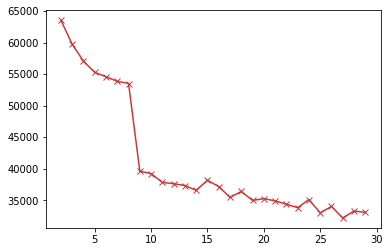

In [4]:
import matplotlib.pyplot as plt
plt.plot(np.arange(2,30), cost, 'bx-', color = '#C93838');

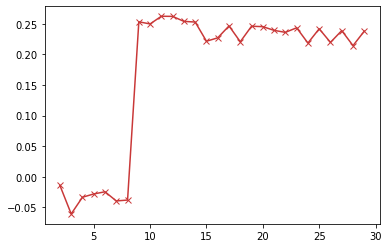

In [5]:
plt.plot(np.arange(2,30), sil, 'bx-', color = '#C93838')

In [7]:
kmodes= KModes(n_clusters=9, init = "Cao", n_init = 1, verbose=1)
kmodes.fit(X)
labels=kmodes.labels_
clusters_Kmode=pd.concat([cci_data, pd.DataFrame({'cluster':labels})], axis=1)
clusters_Kmode.dropna(inplace = True)
# clusters_Kmode.to_csv("Kmodes/data.csv", index=False)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4278, cost: 53420.0
Run 1, iteration: 2/100, moves: 3815, cost: 43052.0
Run 1, iteration: 3/100, moves: 5859, cost: 39628.0
Run 1, iteration: 4/100, moves: 1582, cost: 39628.0


In [8]:
clusters_Kmode.head()

,TENURE,Loyalty,AVG_BALANCE_RANGE,NUM_TRANS_RANGE,ACCESSORIES_RANGE,APPLIANCES_RANGE,CULTURE_RANGE,GAS_RANGE,BOOKS_RANGE,APPAREL_RANGE,FITNESS_RANGE,EDUCATION_RANGE,ENTERTAINMENT_RANGE,FOOD_RANGE,HEALTH_RANGE,HOME_GARDEN_RANGE,TELCOS_RANGE,TRAVEL_RANGE,PURCHASES_AMOUNT_RANGE,cluster
0,12,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7,5
1,12,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7,5
2,12,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,7,5
3,12,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7,0,1,1,0,1,0,1,0,0,0,0,0,1,1,1,0,0,7,8


In [9]:
clusters_Kmode.groupby('cluster').mean()

,TENURE,Loyalty,AVG_BALANCE_RANGE,NUM_TRANS_RANGE,ACCESSORIES_RANGE,APPLIANCES_RANGE,CULTURE_RANGE,GAS_RANGE,BOOKS_RANGE,APPAREL_RANGE,FITNESS_RANGE,EDUCATION_RANGE,ENTERTAINMENT_RANGE,FOOD_RANGE,HEALTH_RANGE,HOME_GARDEN_RANGE,TELCOS_RANGE,TRAVEL_RANGE,PURCHASES_AMOUNT_RANGE
cluster,,,,,,,,,,,,,,,,,,,
0,11.242576,0.000000,1.619916,0.019690,0.000000,0.000484,0.000000,0.000000,0.000000,0.000161,0.000000,0.000161,0.000161,0.000000,0.000000,0.000000,0.000161,0.000000,0.001614
1,11.802618,0.889225,1.564955,1.278953,0.823766,0.766365,0.092649,0.407855,0.398792,0.981873,0.062437,0.055388,0.719033,0.821752,0.777442,0.790534,0.609265,0.798590,7.000000
2,11.664649,0.640431,1.613522,1.047090,0.762866,0.649176,0.035654,0.187016,0.127144,0.921628,0.014464,0.009082,0.101581,0.664312,0.246552,0.223343,0.132526,0.158089,6.963000
3,11.442149,0.152893,1.260331,1.037190,0.673554,0.668388,0.026860,0.121901,0.115702,0.870868,0.052686,0.026860,0.175620,0.075413,0.201446,0.146694,0.688017,0.730372,6.895661
4,11.327056,0.131827,1.310107,1.031387,0.803515,0.130571,0.039548,0.086629,0.095417,0.956685,0.006277,0.008788,0.074702,0.146893,0.241682,0.675455,0.053986,0.098556,6.869429
5,11.268885,0.301587,1.457831,1.011283,0.073628,0.302544,0.007267,0.122203,0.047428,0.264487,0.014343,0.005355,0.103270,0.147064,0.135207,0.085102,0.185695,0.121056,6.769363
6,11.840426,0.797872,1.514184,1.131206,0.783688,0.854610,0.085106,0.290780,0.783688,0.925532,0.088652,0.039007,0.677305,0.180851,0.131206,0.734043,0.606383,0.283688,6.996454
7,11.415313,0.255220,1.331787,1.023202,0.638051,0.134571,0.025522,0.809745,0.160093,0.842227,0.034803,0.023202,0.269142,0.816705,0.245940,0.136891,0.081206,0.807425,6.941995
8,11.581699,0.320261,1.287582,1.013072,0.127451,0.928105,0.013072,0.777778,0.062092,0.316993,0.042484,0.000000,0.124183,0.326797,0.143791,0.689542,0.810458,0.169935,6.960784


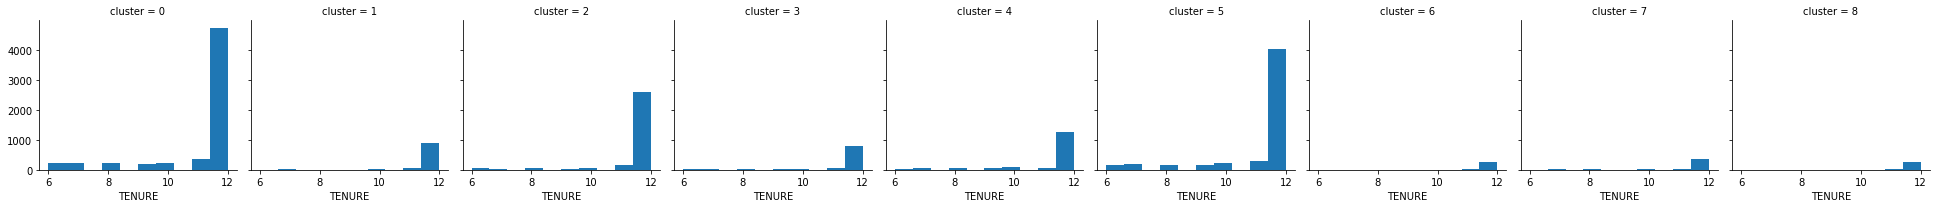

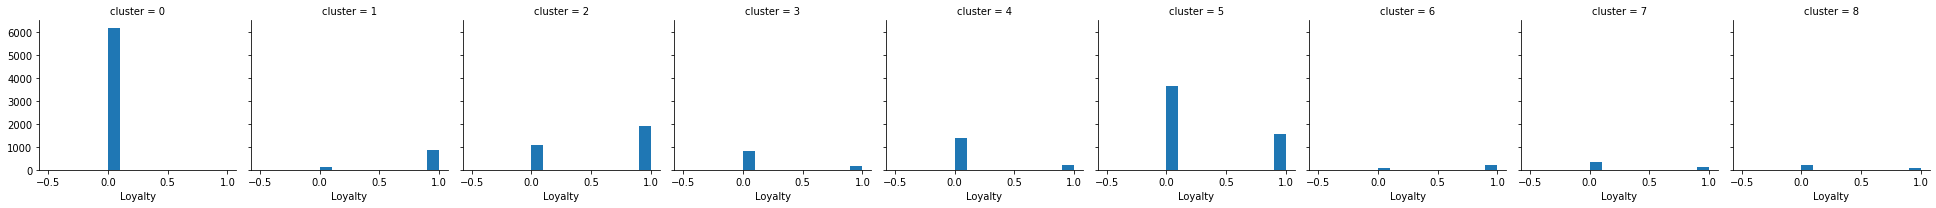

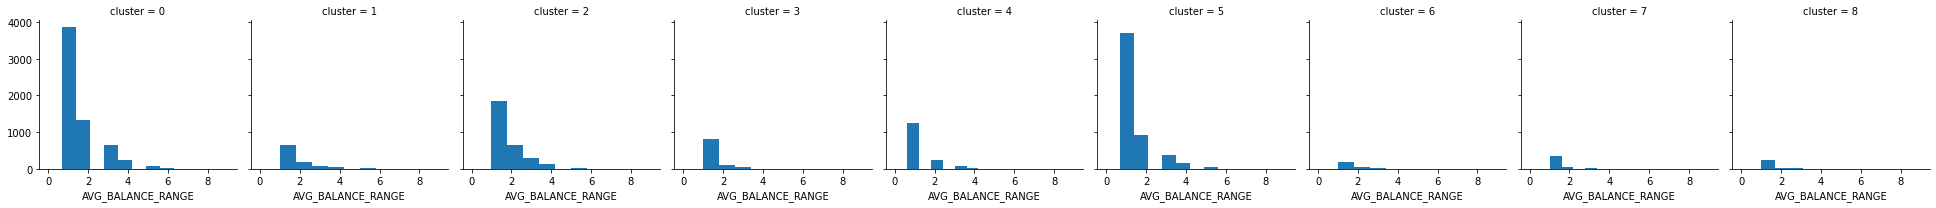

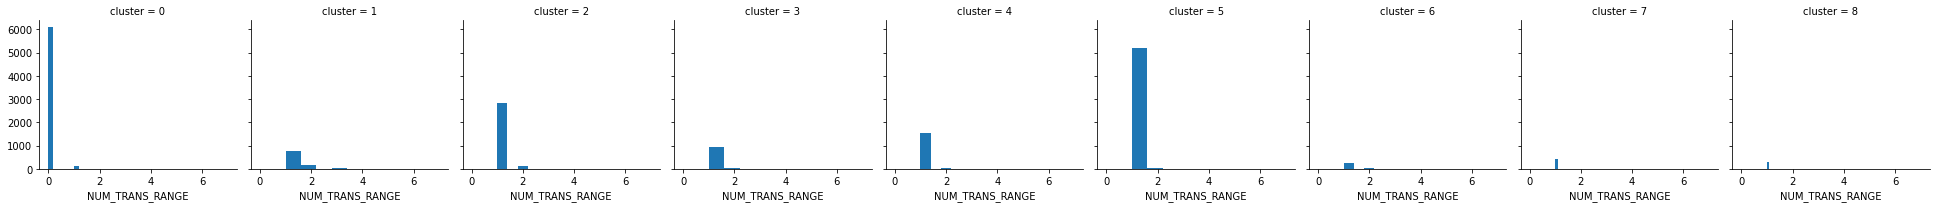

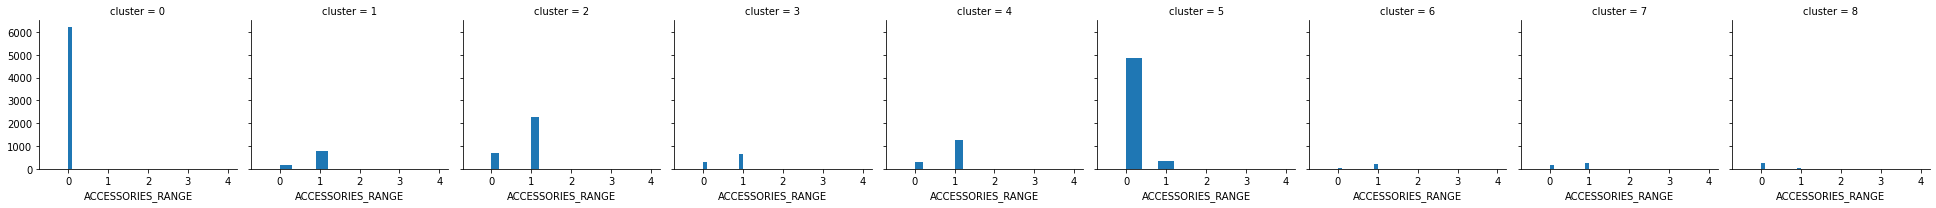

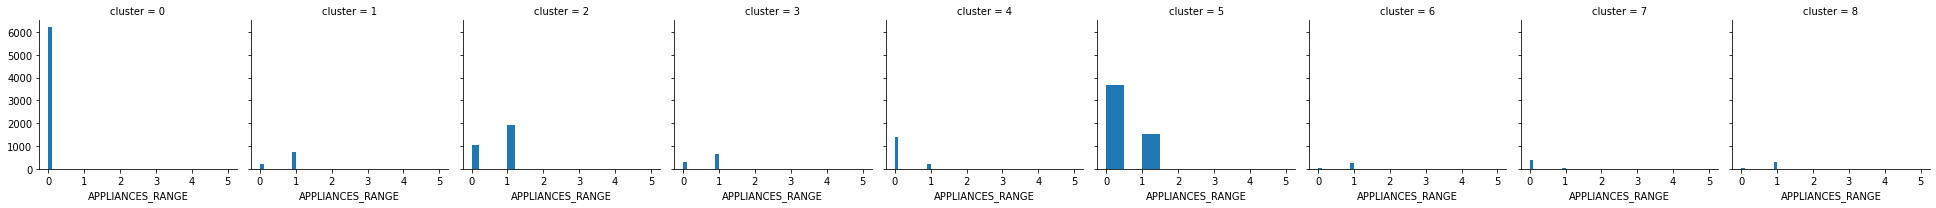

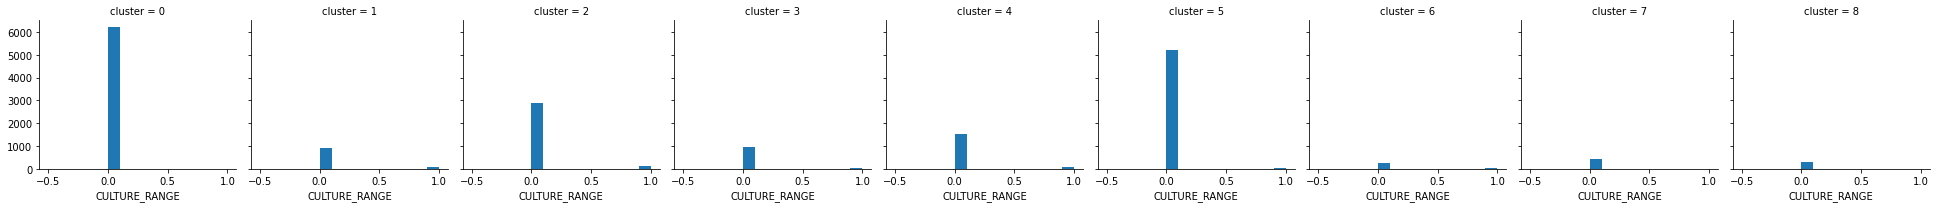

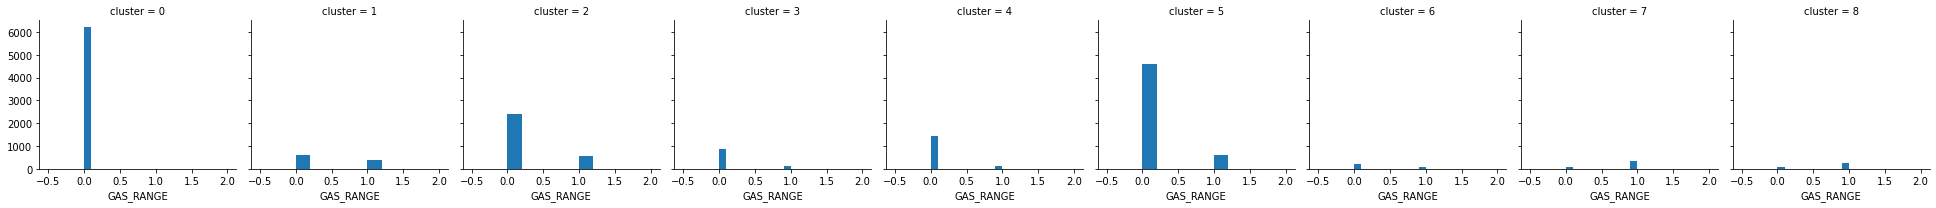

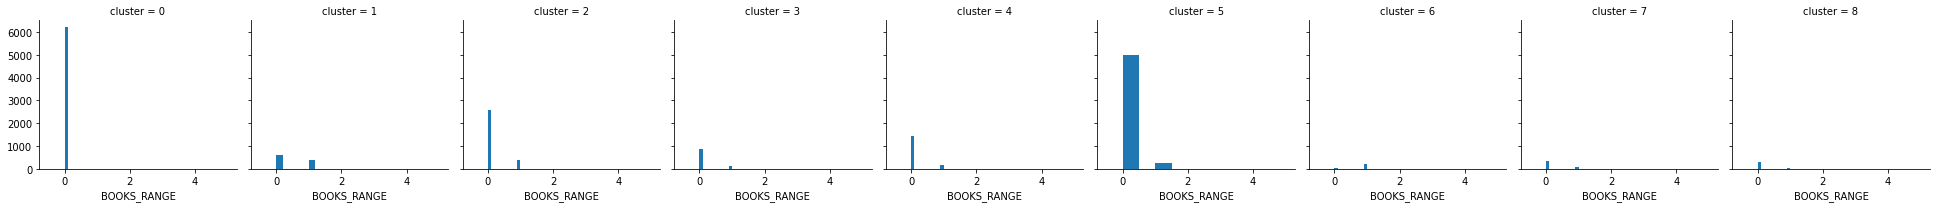

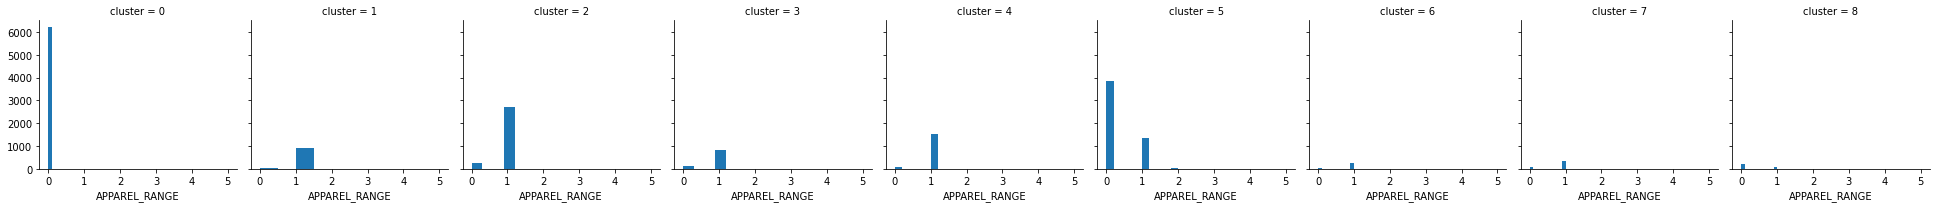

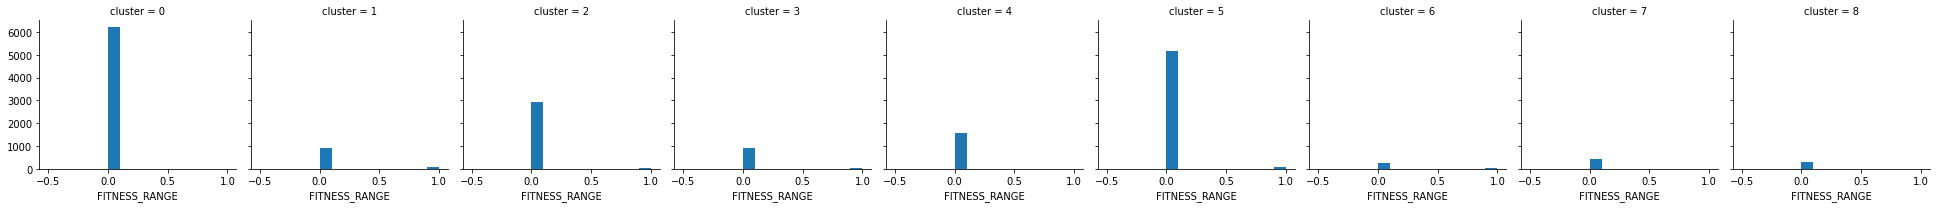

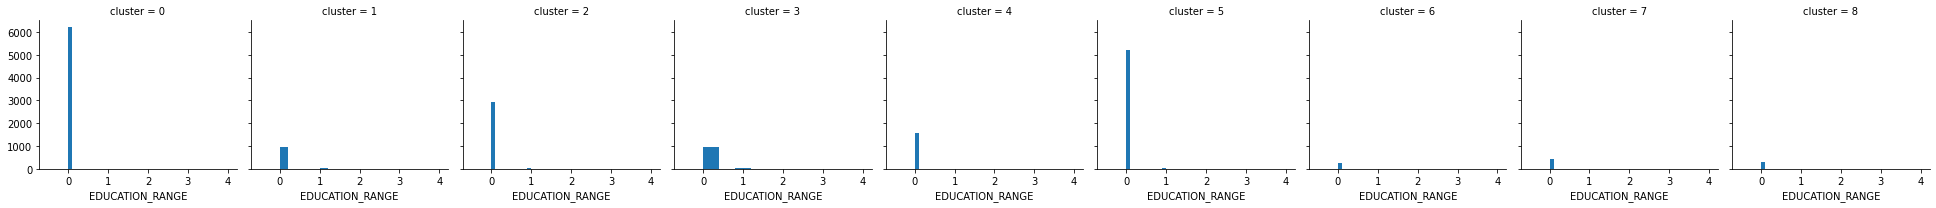

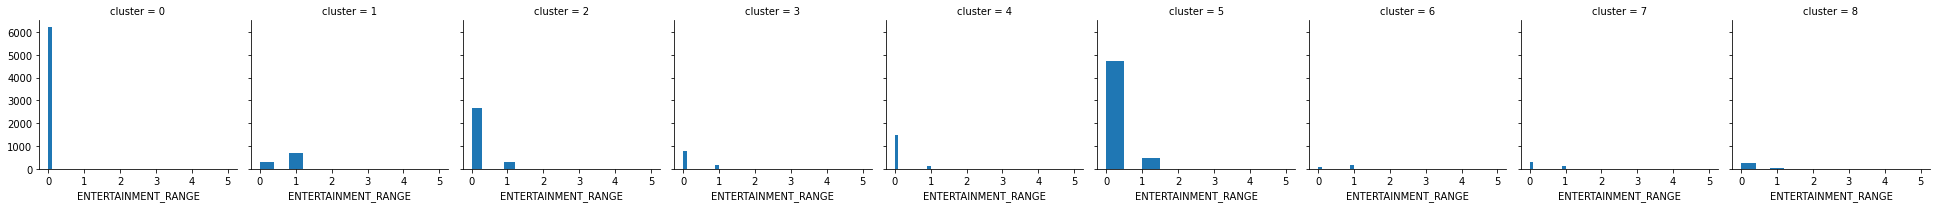

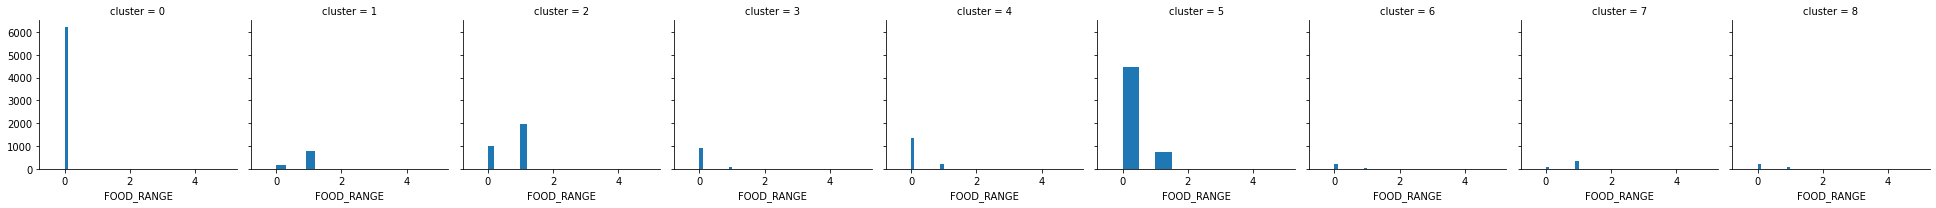

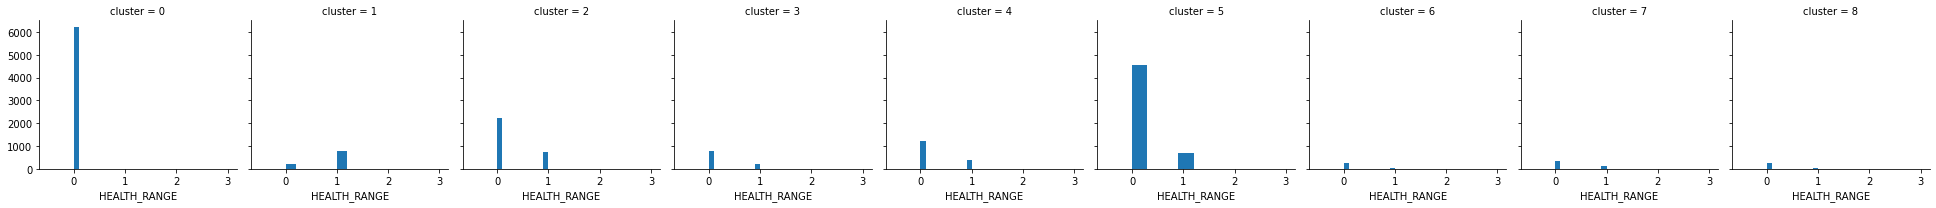

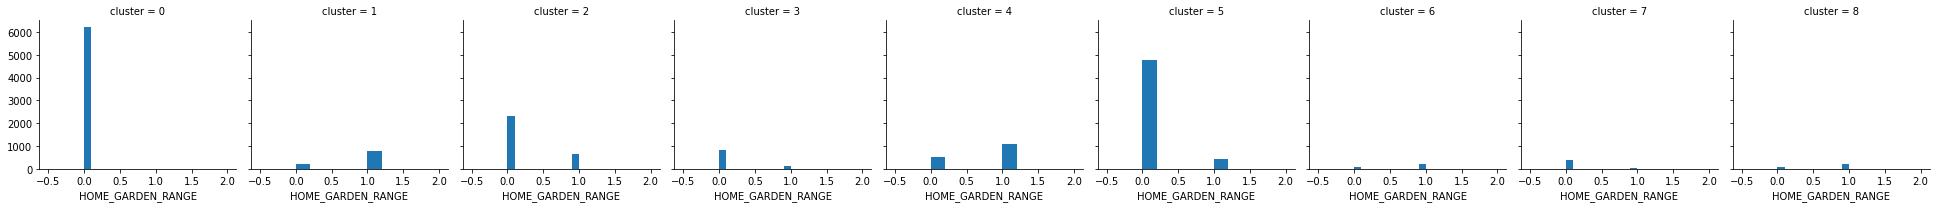

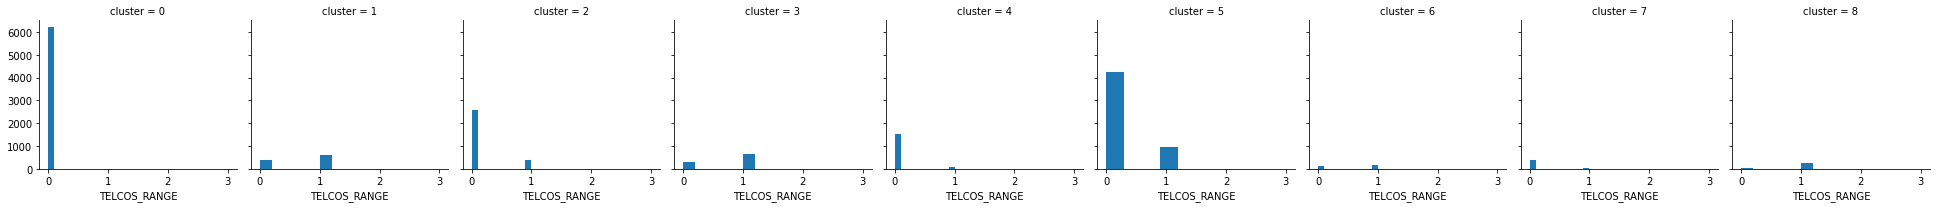

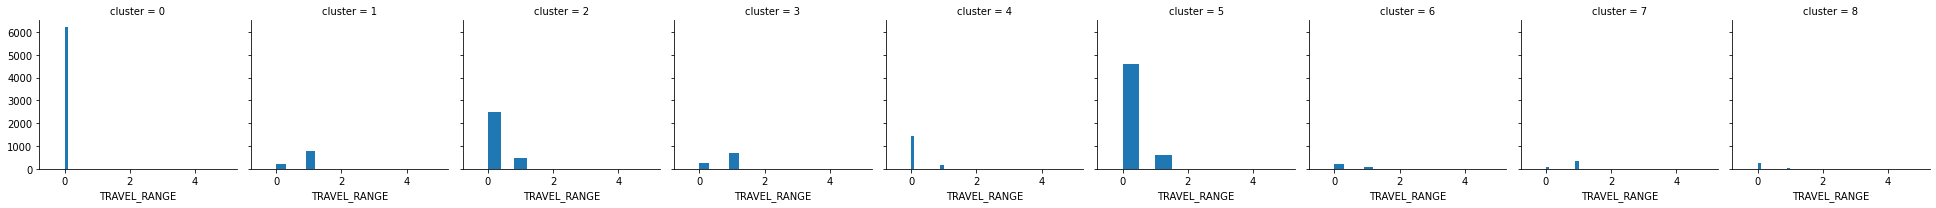

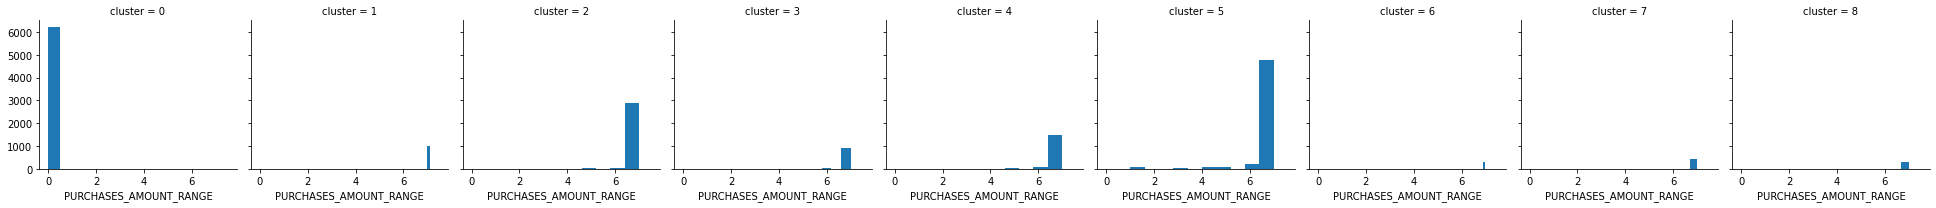

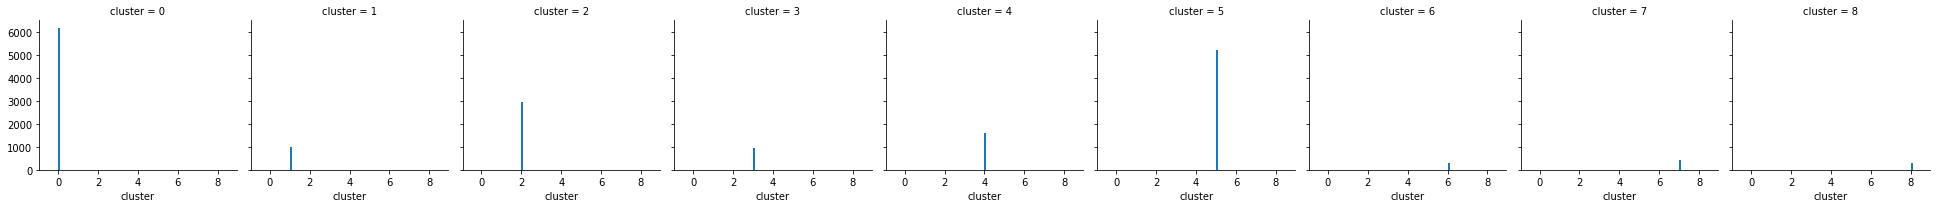

In [10]:
for c in clusters_Kmode:
    grid= sns.FacetGrid(clusters_Kmode, col='cluster')
    grid.map(plt.hist, c)

# Hierarchical

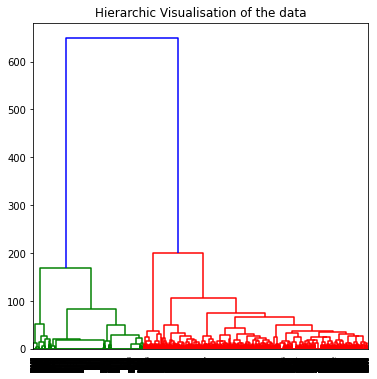

In [27]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
X= np.asarray(cci_data)
plt.figure(figsize =(6, 6))
plt.title('Hierarchic Visualisation of the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward', metric= 'euclidean')))

In [28]:
from sklearn.cluster import AgglomerativeClustering
sil = []
for n_cluster in range(2, 8):
    sil.append(silhouette_score(X, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X)))

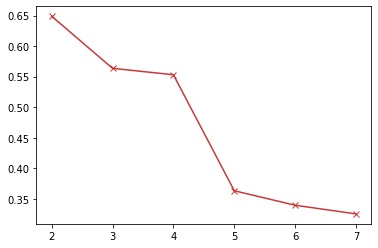

In [29]:
plt.plot(np.arange(2,8), sil, 'bx-', color = '#C93838')

In [32]:
agg = AgglomerativeClustering(n_clusters = 4).fit_predict(X)
clusters_H=pd.concat([cci_data, pd.DataFrame({'cluster':agg})], axis=1)
clusters_H.dropna(inplace = True)
clusters_H.head()

,TENURE,Loyalty,AVG_BALANCE_RANGE,NUM_TRANS_RANGE,ACCESSORIES_RANGE,APPLIANCES_RANGE,CULTURE_RANGE,GAS_RANGE,BOOKS_RANGE,APPAREL_RANGE,FITNESS_RANGE,EDUCATION_RANGE,ENTERTAINMENT_RANGE,FOOD_RANGE,HEALTH_RANGE,HOME_GARDEN_RANGE,TELCOS_RANGE,TRAVEL_RANGE,PURCHASES_AMOUNT_RANGE,cluster
0,12,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7,0
1,12,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7,0
2,12,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,7,0
3,12,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,7,0,1,1,0,1,0,1,0,0,0,0,0,1,1,1,0,0,7,2


In [33]:
clusters_H.groupby('cluster').mean()

,TENURE,Loyalty,AVG_BALANCE_RANGE,NUM_TRANS_RANGE,ACCESSORIES_RANGE,APPLIANCES_RANGE,CULTURE_RANGE,GAS_RANGE,BOOKS_RANGE,APPAREL_RANGE,FITNESS_RANGE,EDUCATION_RANGE,ENTERTAINMENT_RANGE,FOOD_RANGE,HEALTH_RANGE,HOME_GARDEN_RANGE,TELCOS_RANGE,TRAVEL_RANGE,PURCHASES_AMOUNT_RANGE
cluster,,,,,,,,,,,,,,,,,,,
0,11.826547,0.443746,1.482483,1.051648,0.475424,0.453387,0.029267,0.204442,0.130584,0.652320,0.023414,0.014203,0.178445,0.351640,0.233709,0.289576,0.259964,0.263579,6.932341
1,11.907481,0.000000,1.694080,0.034837,0.002475,0.004569,0.000190,0.001713,0.001142,0.004569,0.001523,0.000000,0.001142,0.001713,0.001904,0.001142,0.001523,0.000571,0.016562
2,7.326148,0.000000,1.241799,1.014058,0.375820,0.392690,0.021556,0.130272,0.067479,0.546392,0.013121,0.006560,0.104030,0.258669,0.237113,0.203374,0.138707,0.164011,6.694470
3,7.882012,0.000000,1.225338,0.027079,0.000967,0.003868,0.000000,0.001934,0.000000,0.001934,0.000000,0.000000,0.000967,0.000000,0.000967,0.001934,0.000967,0.000000,0.008704


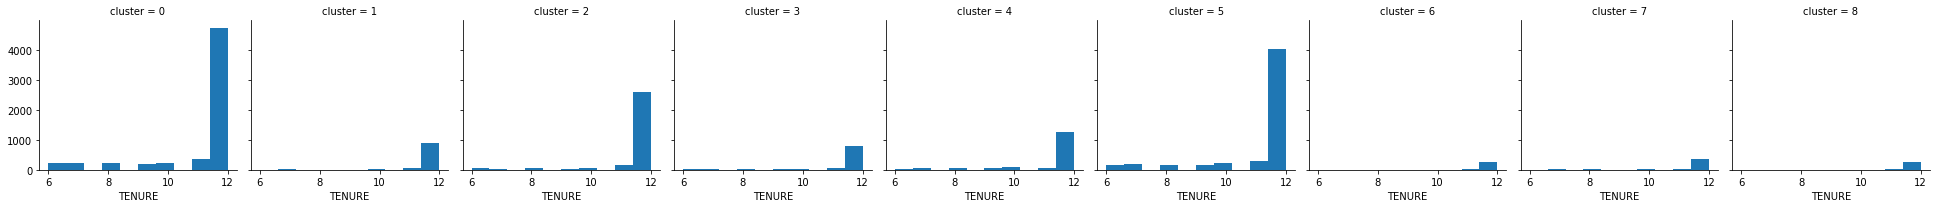

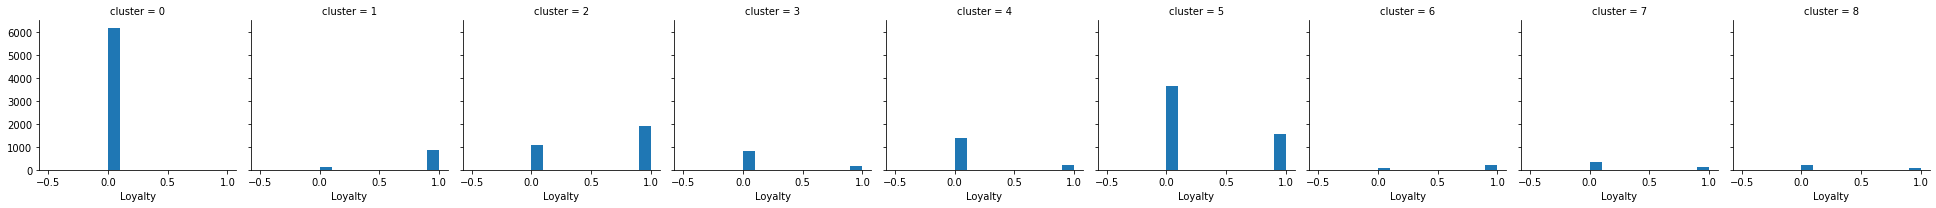

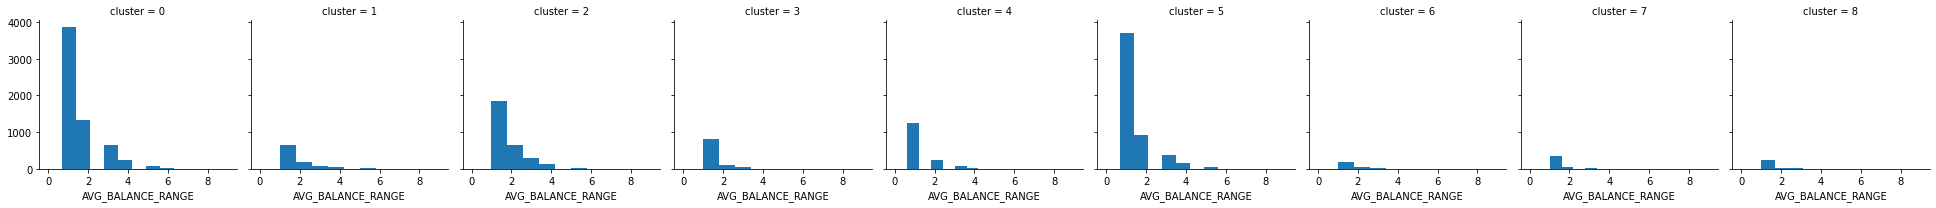

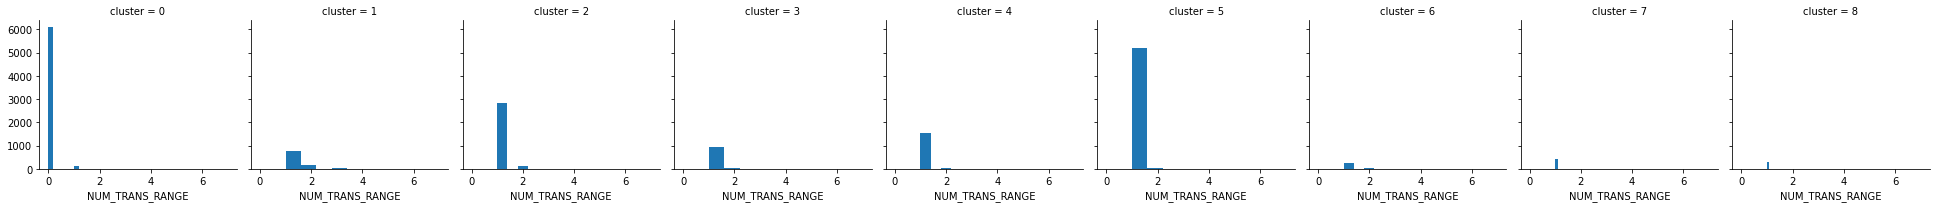

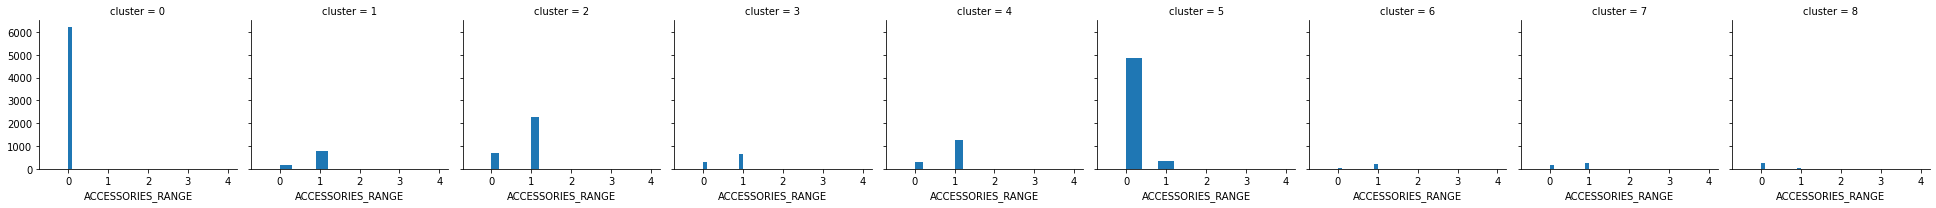

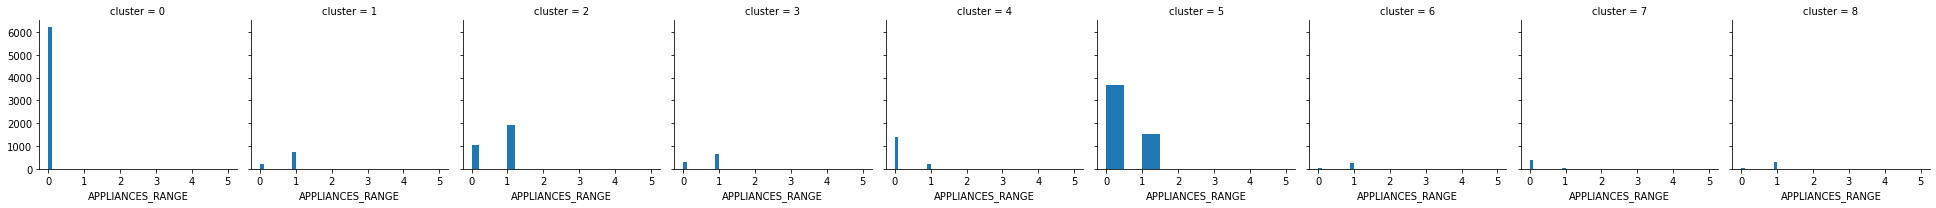

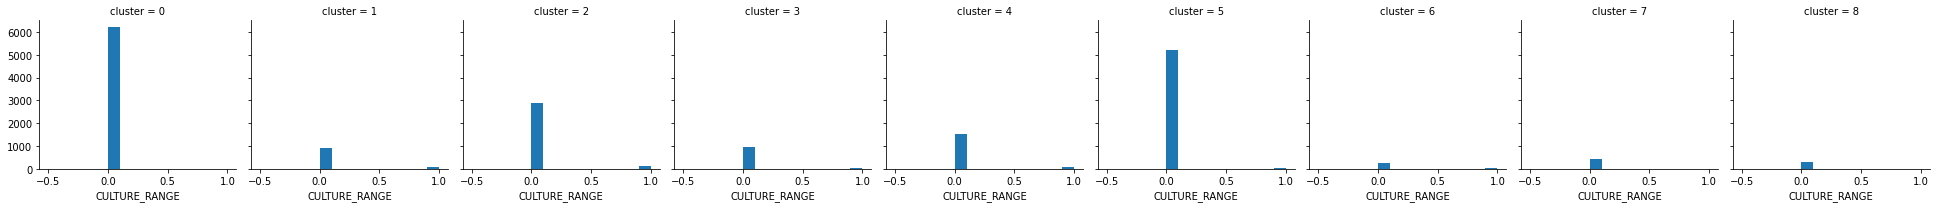

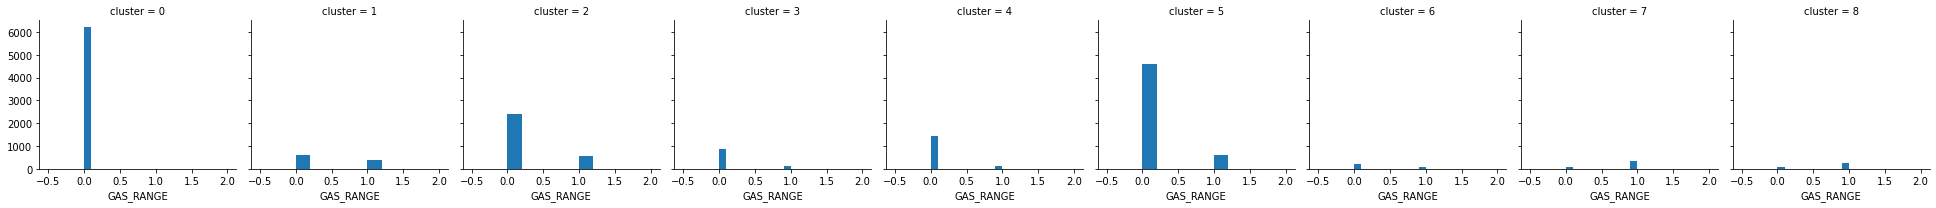

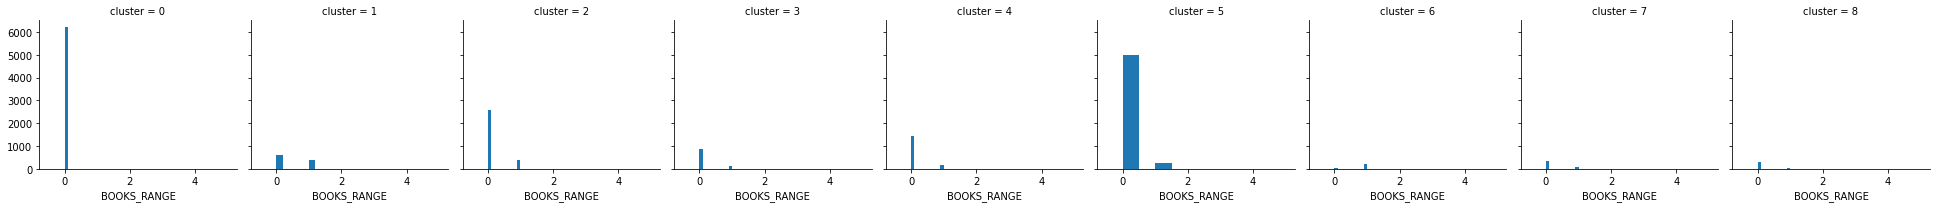

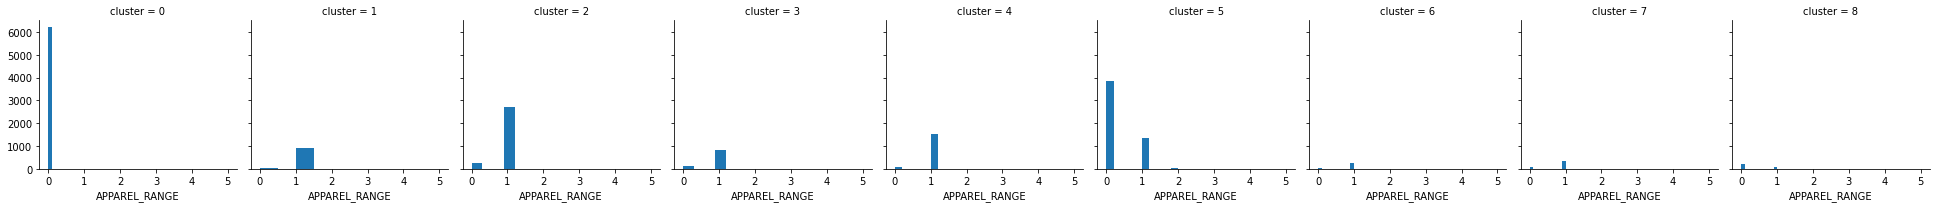

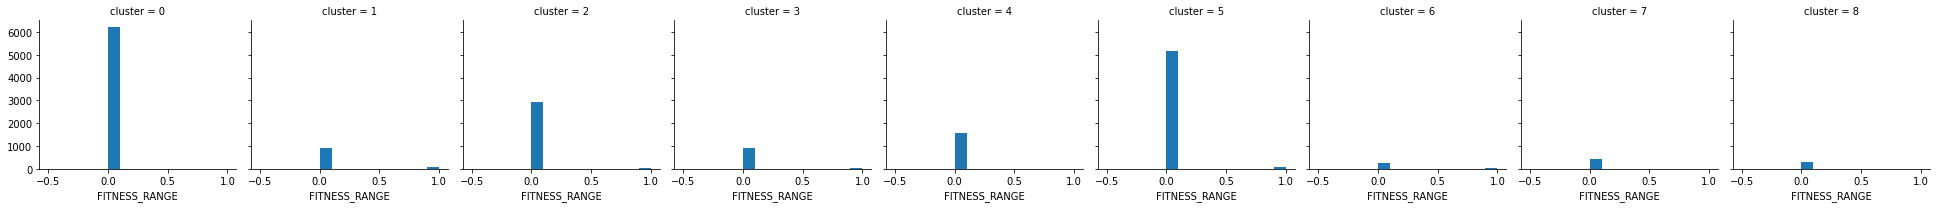

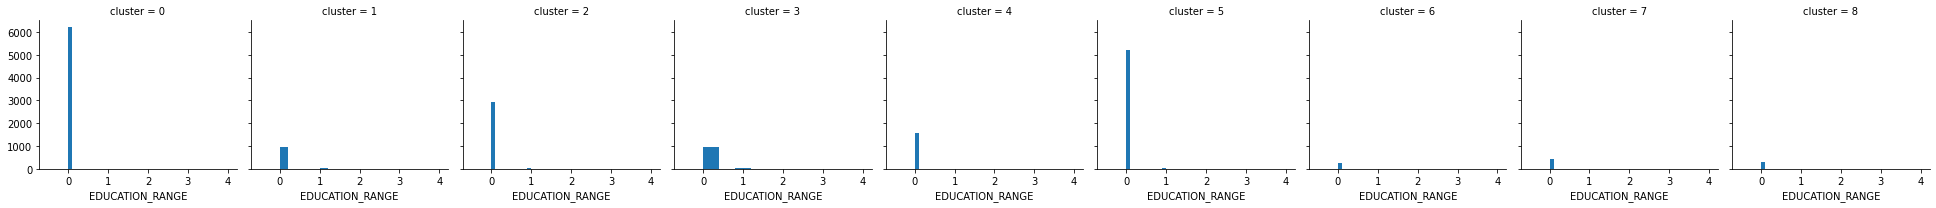

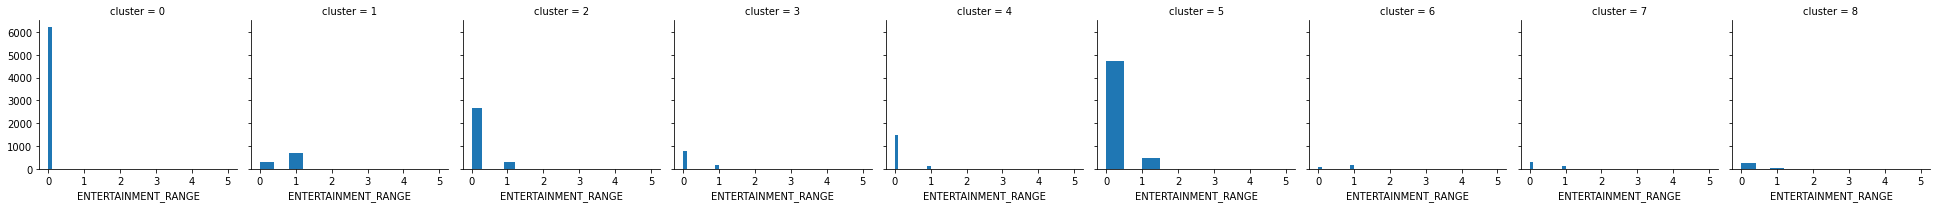

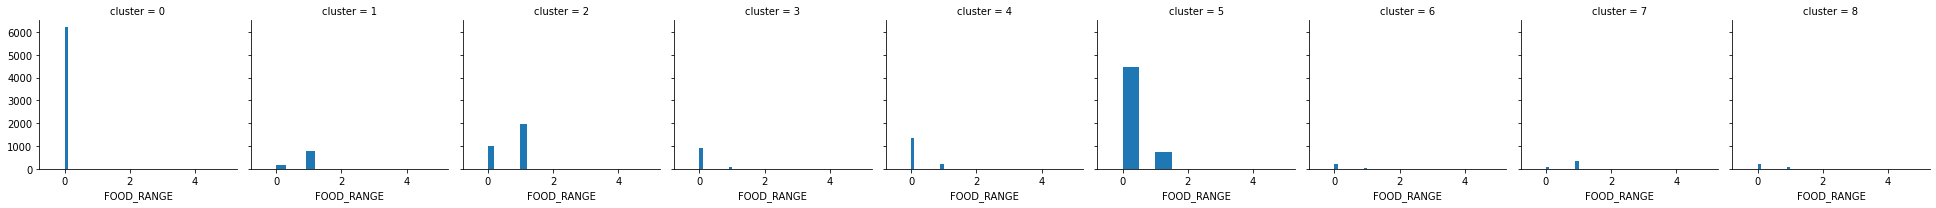

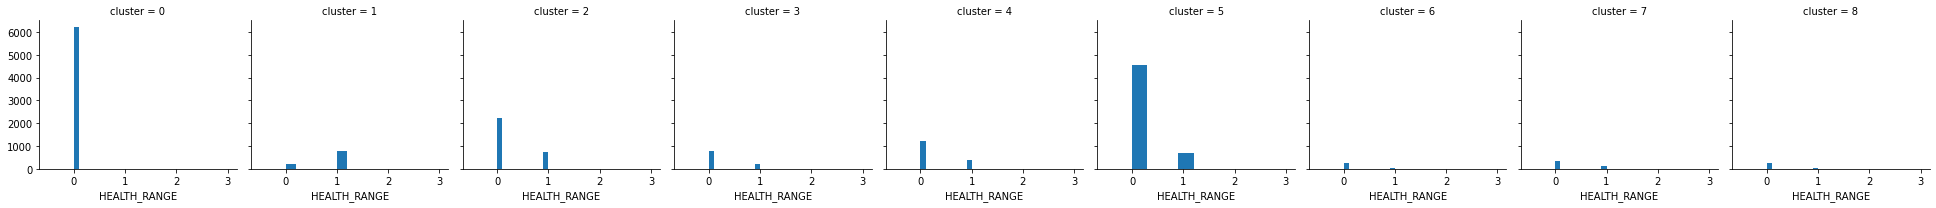

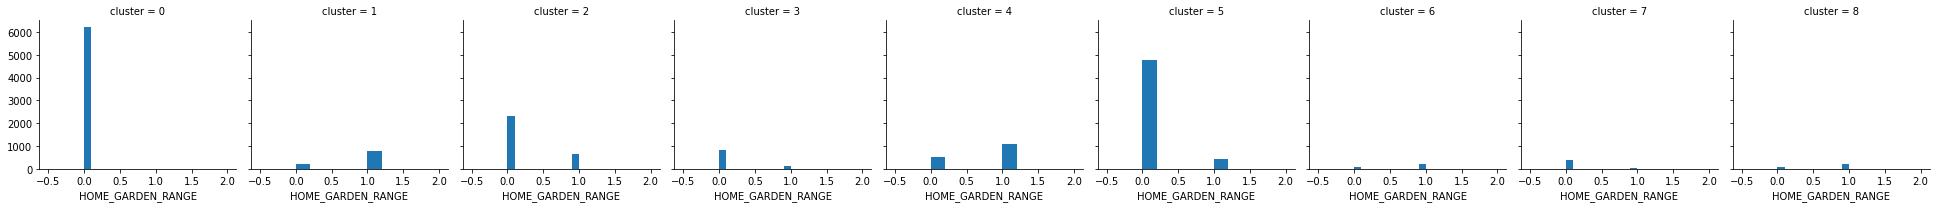

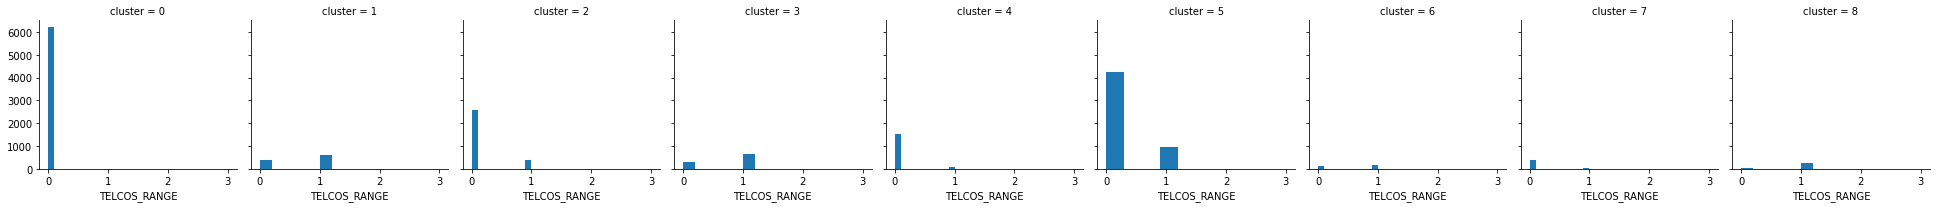

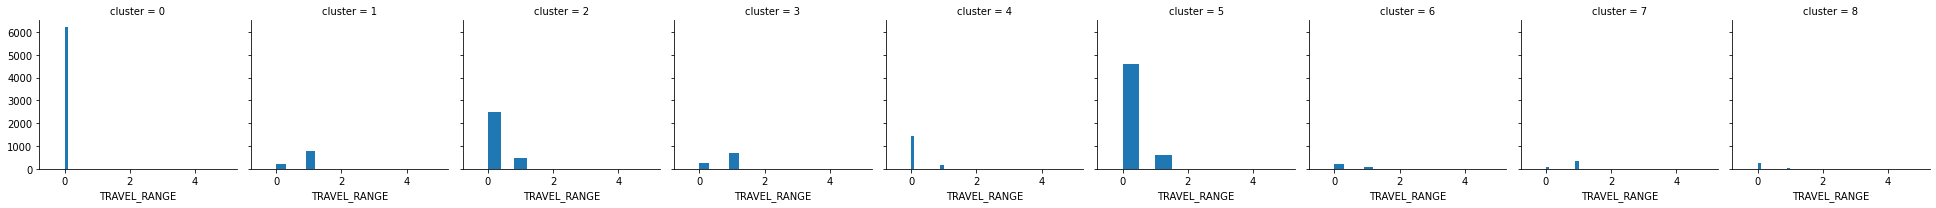

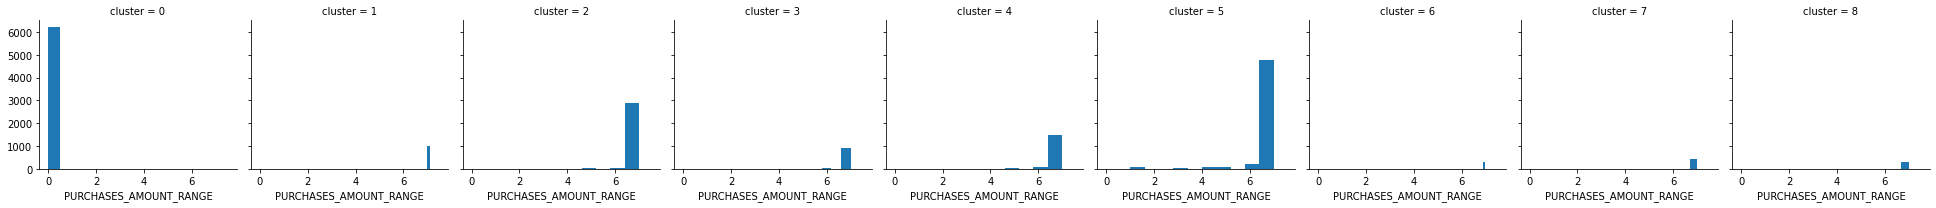

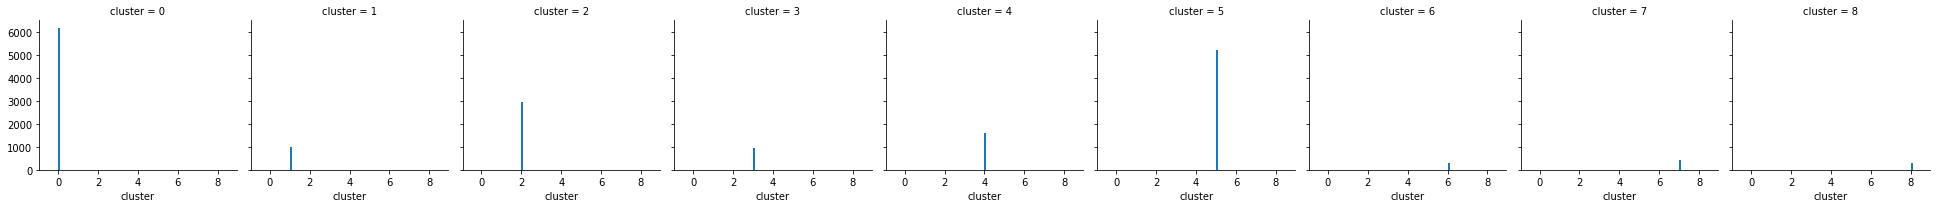

In [16]:
for c in clusters_H:
    grid= sns.FacetGrid(clusters_Kmode, col='cluster')
    grid.map(plt.hist, c)

# K-Modes/Hierarchical

In [17]:
kmodes= KModes(n_clusters=800, init = "Cao", n_init = 1, verbose=1)
kmodes.fit(X)
labels=kmodes.labels_
clusters_Kmode=pd.concat([cci_data, pd.DataFrame({'cluster':labels})], axis=1)
clusters_Kmode.dropna(inplace = True)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5033, cost: 15004.0
Run 1, iteration: 2/100, moves: 937, cost: 14884.0
Run 1, iteration: 3/100, moves: 128, cost: 14883.0
Run 1, iteration: 4/100, moves: 3, cost: 14883.0


In [18]:
C = clusters_Kmode.groupby('cluster').mean()

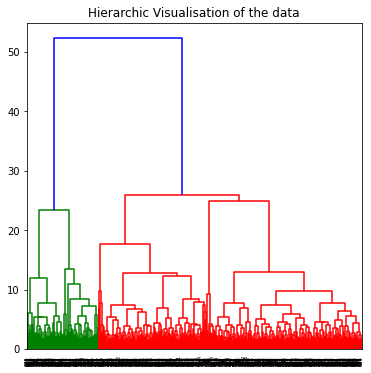

In [19]:
X= np.asarray(C)
plt.figure(figsize =(6, 6))
plt.title('Hierarchic Visualisation of the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward', metric= 'euclidean')))

In [20]:
sil = []
for n_cluster in range(2, 8):
    sil.append(silhouette_score(X, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X)))

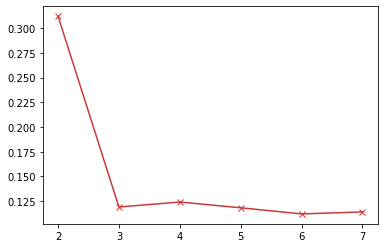

In [21]:
plt.plot(np.arange(2,8), sil, 'bx-', color = '#C93838')

In [22]:
agg = AgglomerativeClustering(n_clusters = 3).fit_predict(X)
clusters_H=pd.concat([cci_data, pd.DataFrame({'cluster':agg})], axis=1)
clusters_H.dropna(inplace = True)
clusters_H.head()

,TENURE,Loyalty,AVG_BALANCE_RANGE,NUM_TRANS_RANGE,ACCESSORIES_RANGE,APPLIANCES_RANGE,CULTURE_RANGE,GAS_RANGE,BOOKS_RANGE,APPAREL_RANGE,FITNESS_RANGE,EDUCATION_RANGE,ENTERTAINMENT_RANGE,FOOD_RANGE,HEALTH_RANGE,HOME_GARDEN_RANGE,TELCOS_RANGE,TRAVEL_RANGE,PURCHASES_AMOUNT_RANGE,cluster
0,12,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7,0.0
1,12,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7,2.0
2,12,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,7,2.0
3,12,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,7,0,1,1,0,1,0,1,0,0,0,0,0,1,1,1,0,0,7,2.0


In [23]:
clusters_H.groupby('cluster').mean()

,TENURE,Loyalty,AVG_BALANCE_RANGE,NUM_TRANS_RANGE,ACCESSORIES_RANGE,APPLIANCES_RANGE,CULTURE_RANGE,GAS_RANGE,BOOKS_RANGE,APPAREL_RANGE,FITNESS_RANGE,EDUCATION_RANGE,ENTERTAINMENT_RANGE,FOOD_RANGE,HEALTH_RANGE,HOME_GARDEN_RANGE,TELCOS_RANGE,TRAVEL_RANGE,PURCHASES_AMOUNT_RANGE
cluster,,,,,,,,,,,,,,,,,,,
0.0,11.606469,0.401617,1.838275,0.832884,0.363881,0.377358,0.018868,0.196765,0.113208,0.536388,0.016173,0.000000,0.150943,0.339623,0.202156,0.296496,0.245283,0.247978,5.382749
1.0,11.552326,0.412791,1.959302,0.767442,0.331395,0.313953,0.040698,0.191860,0.122093,0.459302,0.000000,0.000000,0.104651,0.337209,0.203488,0.203488,0.238372,0.203488,4.970930
2.0,11.544747,0.346304,1.809339,0.766537,0.365759,0.354086,0.027237,0.175097,0.089494,0.474708,0.023346,0.023346,0.124514,0.256809,0.151751,0.229572,0.190661,0.221790,4.894942


In [24]:
for c in clusters_H:
    grid= sns.FacetGrid(clusters_Kmode, col='cluster')
    grid.map(plt.hist, c)

ValueError: Image size of 172800x216 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001A8513A4828> (for post_execute):


ValueError: Image size of 172800x216 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 172800x216 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 172800x216 with 800 Axes>